In [1]:
import numpy as np
import os
import pandas as pd
from corm import model
from helper_fxns import gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, create_logp_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/git/accre_data_analysis/corm')

In [12]:
traces = {}
for trace in ['a', 'b']:
    traces[trace] = [np.load('corm_dreamzs_5chain_kfs_'+trace+'_sampled_params_chain_0.npy')]
    for chain in range(1, 5):
        traces[trace].append(np.load('corm_dreamzs_5chain_kfs_'+trace+'_sampled_params_chain_'+str(chain)+'.npy'))      

In [13]:
logps = {}
for trace in ['a', 'b']:
    logps[trace] = [np.load('corm_dreamzs_5chain_kfs_'+trace+'_logps_chain_0.npy')]

    for chain in range(1, 5):
        logps[trace].append(np.load('corm_dreamzs_5chain_kfs_'+trace+'_logps_chain_'+str(chain)+'.npy'))      

In [14]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2', 'kf_AA_cat2', 'kf_AA_cat3', 'kf_AG_cat2', 'kf_AG_cat3', 'kf_AA_allo1', 'kf_AA_allo2', 'kf_AA_allo3', 'kf_AG_allo1', 'kf_AG_allo2']
for run in ['a', 'b']:
    for i, param in enumerate(param_trace_dict_a['param_list']):
        param_trace_dict_a[param] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2', 'kf_AA_cat2', 'kf_AA_cat3', 'kf_AG_cat2', 'kf_AG_cat3', 'kf_AA_allo1', 'kf_AA_allo2', 'kf_AA_allo3', 'kf_AG_allo1', 'kf_AG_allo2']

In [15]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  21  of  21  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  12  of  21  parameters.
Percent of parameters with GR below 1.1:  57.1428571429


[21, 100.0, 12, 57.14285714285714]

In [16]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  3  of  21  parameters.
Percent of parameters with GR below 1.2:  14.2857142857
Number of parameters with GR below 1.1:  2  of  21  parameters.
Percent of parameters with GR below 1.1:  9.52380952381


[3, 14.285714285714285, 2, 9.523809523809524]

100000
5
100000


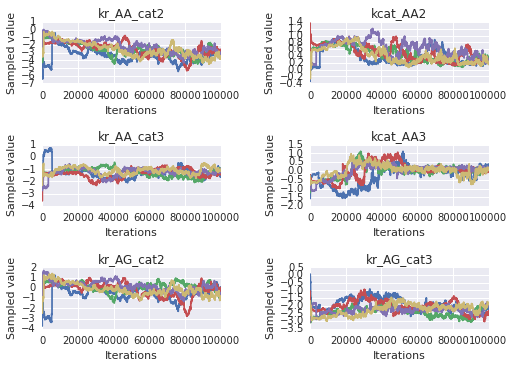

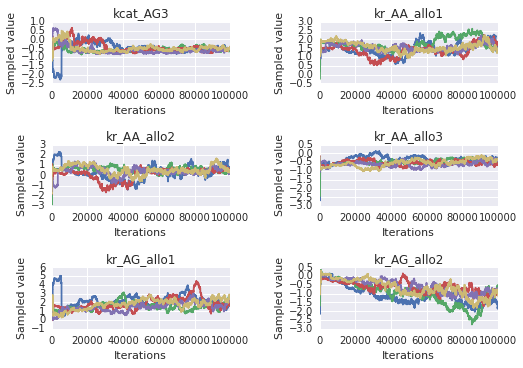

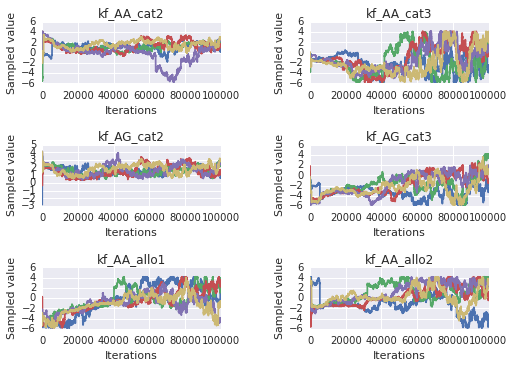

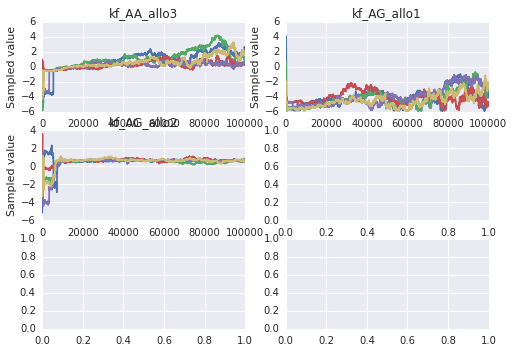

In [17]:
sample_plots(param_trace_dicts['a'])

100000
5
100000


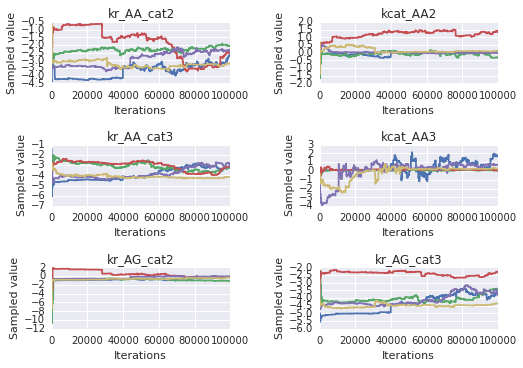

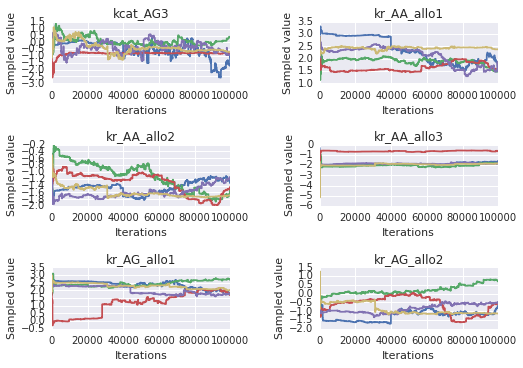

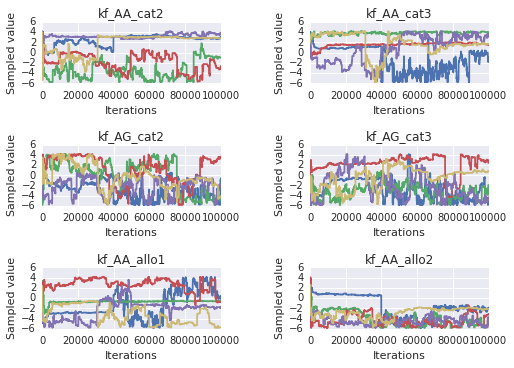

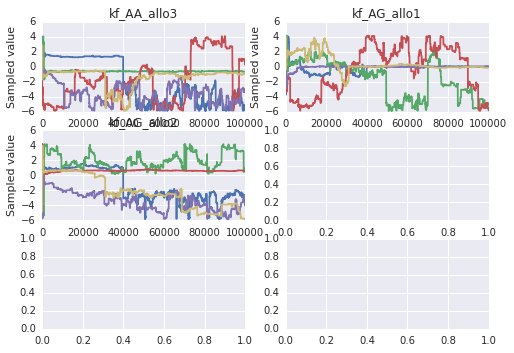

In [19]:
sample_plots(param_trace_dicts['b'])

In [20]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=15000, thin=1)
logp_arr_a = create_logp_matrix(logps['a'], burnin=15000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=15000, thin=1)
logp_arr_b = create_logp_matrix(logps['b'], burnin=15000, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


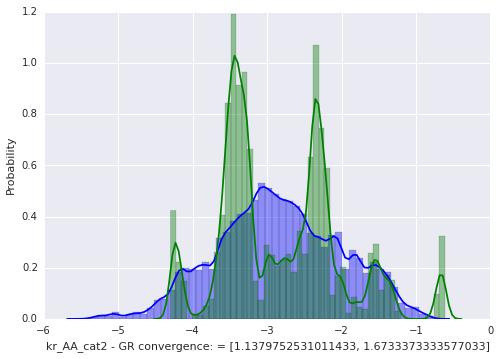

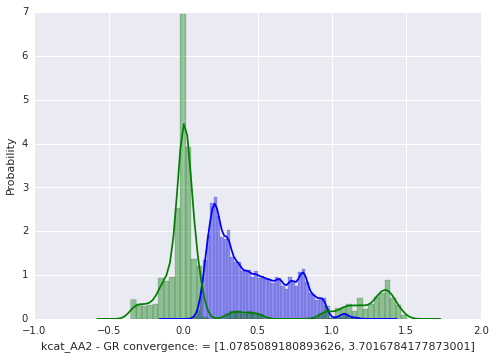

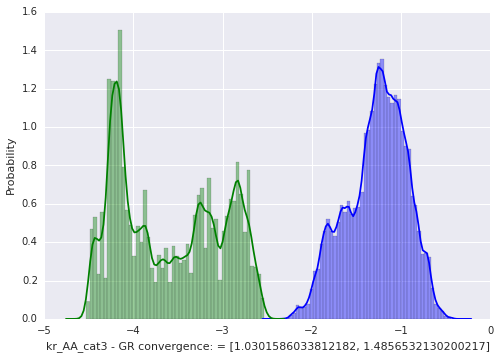

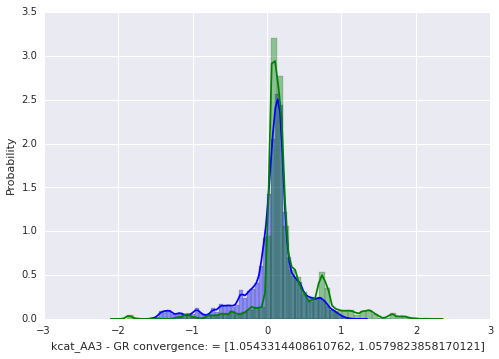

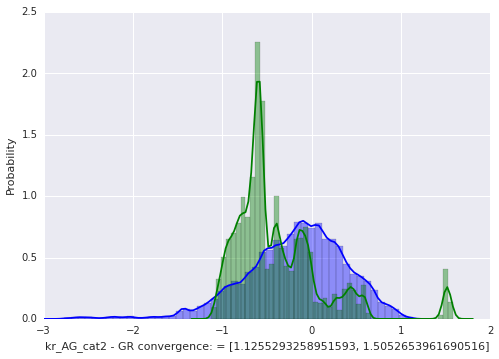

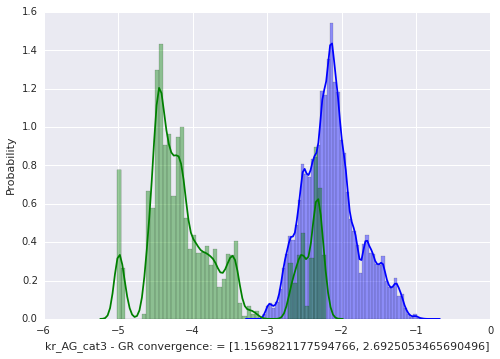

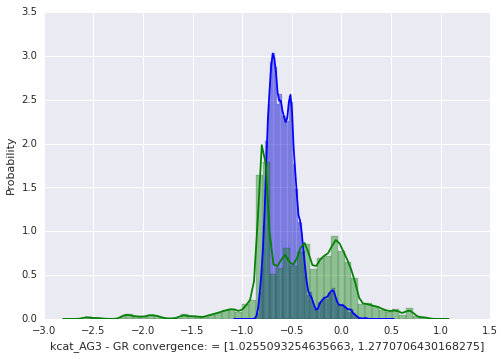

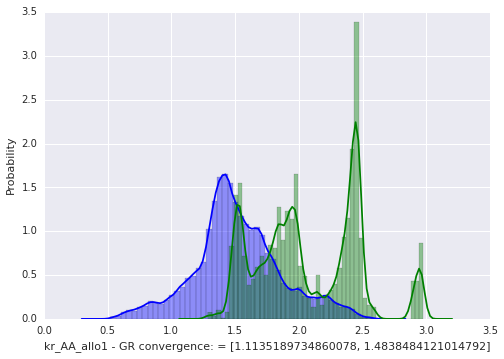

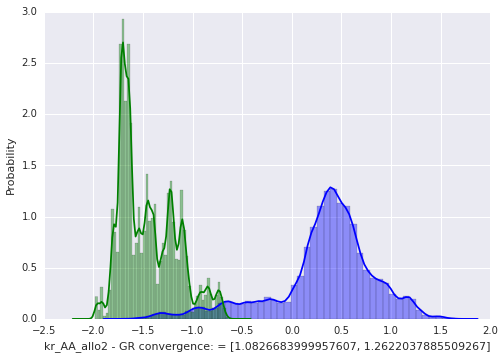

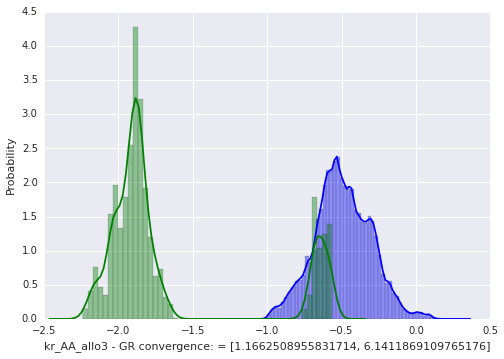

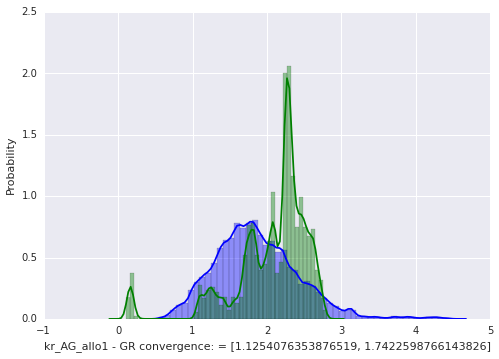

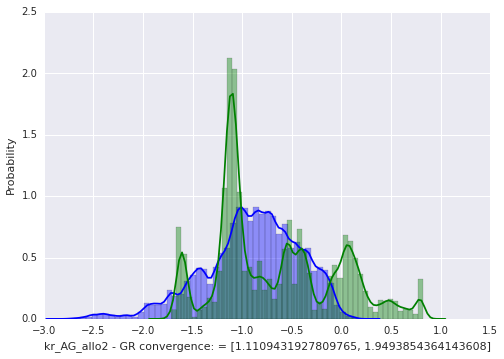

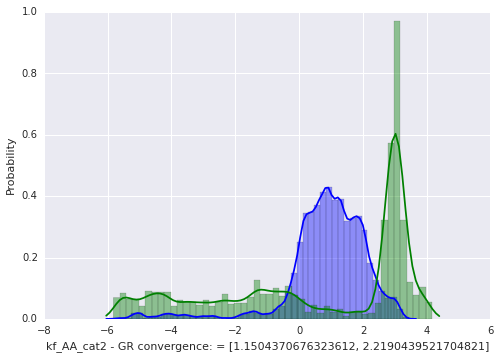

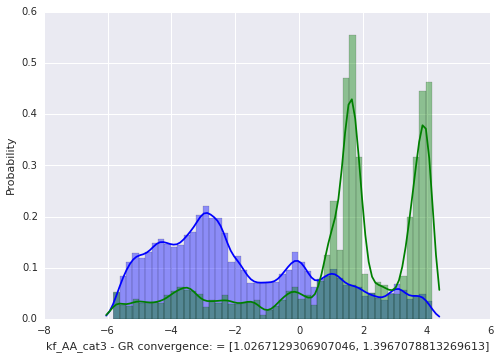

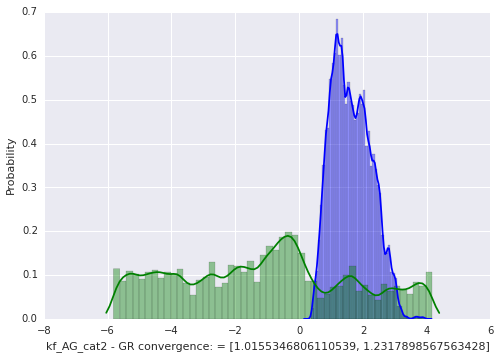

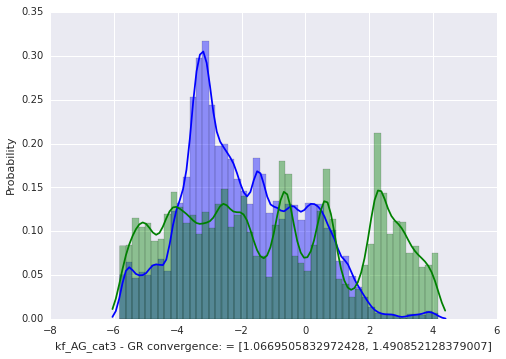

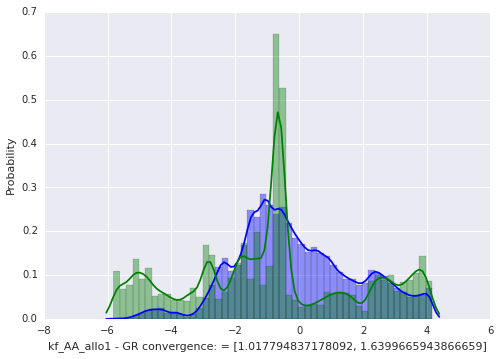

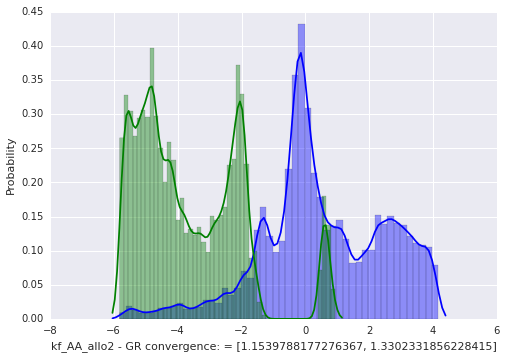

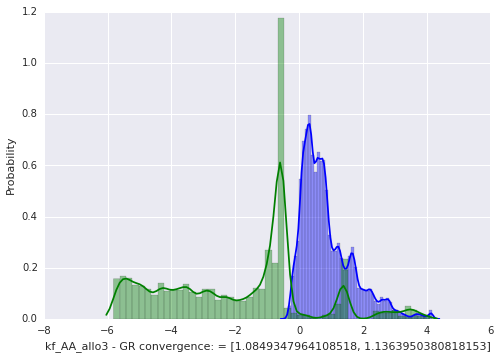

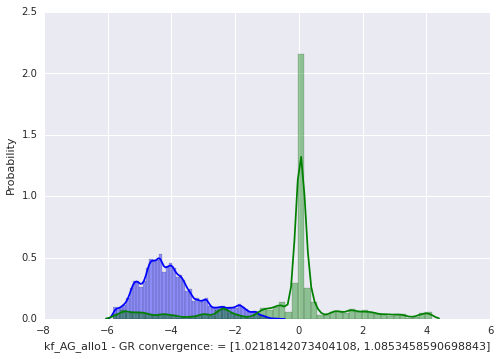

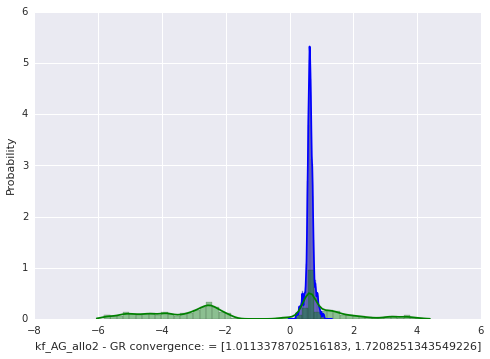

In [21]:
sampled_param_names = ['kr_AA_cat2', 'kcat_AA2', 'kr_AA_cat3', 'kcat_AA3', 'kr_AG_cat2', 'kr_AG_cat3', 'kcat_AG3', 'kr_AA_allo1', 'kr_AA_allo2', 'kr_AA_allo3', 'kr_AG_allo1', 'kr_AG_allo2', 'kf_AA_cat2', 'kf_AA_cat3', 'kf_AG_cat2', 'kf_AG_cat3', 'kf_AA_allo1', 'kf_AA_allo2', 'kf_AA_allo3', 'kf_AG_allo1', 'kf_AG_allo2']
for dim, param_name in enumerate(sampled_param_names):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True, color='g')
    convg_summary = [gelman_rubin_dicts[trace][param_name] for trace in ['a', 'b']]
    sns.axlabel(param_name+' - GR convergence: = '+str(convg_summary), 'Probability')

In [22]:
acceptance_rates = {}
vector_acceptance_rate = {}
running_acceptance_rates = {}
running_acceptance_rates_100window = {}
n_vector_acceptances = {}
n_100windowvec_acceptances = {}
running_acceptance_rates_vec = {}
running_acceptances_rates_vec_100window = {}
n_100window_acceptances = {}
n_acceptances = {}
for run in ['a', 'b']:
    acceptance_rates[run] = {}
    vector_acceptance_rate[run] = {}
    running_acceptance_rates[run] = {}
    running_acceptance_rates_100window[run] = {}
    n_vector_acceptances[run] = {}
    n_100windowvec_acceptances[run] = {}
    running_acceptance_rates_vec[run] = {}
    running_acceptances_rates_vec_100window[run] = {}
    n_100window_acceptances[run] = {}
    n_acceptances[run] = {}
    for chain in range(len(traces[run])):
        acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0],)))
        vector_acceptance_rate[run][chain] = 0
        running_acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0]), len(traces['a'][0])))
        running_acceptance_rates_100window[run][chain] = np.zeros((len(traces['a'][0][0]), 1000))
        n_vector_acceptances[run][chain] = 0
        n_100windowvec_acceptances[run][chain] = 0
        running_acceptance_rates_vec[run][chain] = np.zeros((1, len(traces['a'][0])))
        running_acceptances_rates_vec_100window[run][chain] = np.zeros((1, 1000))
        n_100window_acceptances[run][chain] = {}
        n_acceptances[run][chain] = {}
        for dim in range(len(traces[run][chain][0])):
            n_100window_acceptances[run][chain][dim] = 0
            n_acceptances[run][chain][dim] = 0
            for iteration in range(1, len(traces[run][chain])):
                if dim == 0:
                    comparison = traces[run][chain][iteration] == traces[run][chain][iteration-1]
                    if not np.all(comparison):
                        n_vector_acceptances[run][chain] += 1
                        n_100windowvec_acceptances[run][chain] += 1
                    running_acceptance_rates_vec[run][chain][0, iteration] = float(n_vector_acceptances[run][chain])/iteration
                    if iteration % 100 == 0:
                        running_acceptances_rates_vec_100window[run][chain][0, iteration/100] = float(n_100windowvec_acceptances[run][chain])/100
                        n_100windowvec_acceptances[run][chain] = 0
                if traces[run][chain][iteration][dim] != traces[run][chain][iteration-1][dim]:
                    n_acceptances[run][chain][dim] += 1
                    n_100window_acceptances[run][chain][dim] += 1
                running_acceptance_rates[run][chain][dim, iteration] = float(n_acceptances[run][chain][dim])/iteration
        
                if iteration % 100 == 0:
                    running_acceptance_rates_100window[run][chain][dim, iteration/100] = float(n_100window_acceptances[run][chain][dim])/100
                    n_100window_acceptances[run][chain][dim] = 0
            
            acceptance_rates[run][chain][dim] = float(n_acceptances[run][chain][dim])/len(traces[run][chain])
            print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances[run][chain][dim]),' acceptance rate: ',str(acceptance_rates[run][chain][dim])
        print 'n vector acceptances: ',n_vector_acceptances[run][chain],' for run: ',run,' and chain: ',chain
        print 'Acceptance rate for vector: ',float(n_vector_acceptances[run][chain])/len(traces[run][chain]),' for run: ',run,' and chain: ',chain
running_acceptance_rates
running_acceptance_rates_100window
running_acceptance_rates_vec
running_acceptances_rates_vec_100window


N acceptances for parameter:  kr_AA_cat2  =  4838  acceptance rate:  0.04838
N acceptances for parameter:  kcat_AA2  =  4807  acceptance rate:  0.04807
N acceptances for parameter:  kr_AA_cat3  =  4829  acceptance rate:  0.04829
N acceptances for parameter:  kcat_AA3  =  4840  acceptance rate:  0.0484
N acceptances for parameter:  kr_AG_cat2  =  4828  acceptance rate:  0.04828
N acceptances for parameter:  kr_AG_cat3  =  4809  acceptance rate:  0.04809
N acceptances for parameter:  kcat_AG3  =  4792  acceptance rate:  0.04792
N acceptances for parameter:  kr_AA_allo1  =  4816  acceptance rate:  0.04816
N acceptances for parameter:  kr_AA_allo2  =  4830  acceptance rate:  0.0483
N acceptances for parameter:  kr_AA_allo3  =  4806  acceptance rate:  0.04806
N acceptances for parameter:  kr_AG_allo1  =  4835  acceptance rate:  0.04835
N acceptances for parameter:  kr_AG_allo2  =  4829  acceptance rate:  0.04829
N acceptances for parameter:  kf_AA_cat2  =  4809  acceptance rate:  0.04809
N 

{'a': {0: array([[ 0.  ,  0.17,  0.07,  0.05,  0.14,  0.08,  0.07,  0.03,  0.09,
           0.03,  0.03,  0.05,  0.02,  0.03,  0.03,  0.04,  0.04,  0.01,
           0.03,  0.02,  0.02,  0.03,  0.03,  0.04,  0.01,  0.04,  0.04,
           0.06,  0.06,  0.05,  0.11,  0.03,  0.03,  0.01,  0.  ,  0.05,
           0.04,  0.07,  0.1 ,  0.06,  0.01,  0.09,  0.05,  0.04,  0.06,
           0.09,  0.03,  0.13,  0.05,  0.13,  0.04,  0.07,  0.04,  0.05,
           0.03,  0.06,  0.09,  0.07,  0.03,  0.1 ,  0.04,  0.09,  0.06,
           0.08,  0.05,  0.14,  0.11,  0.05,  0.09,  0.09,  0.08,  0.06,
           0.06,  0.13,  0.05,  0.06,  0.03,  0.05,  0.06,  0.09,  0.04,
           0.02,  0.09,  0.08,  0.1 ,  0.08,  0.06,  0.06,  0.07,  0.06,
           0.06,  0.08,  0.04,  0.06,  0.03,  0.03,  0.04,  0.01,  0.04,
           0.03,  0.03,  0.07,  0.01,  0.05,  0.04,  0.07,  0.07,  0.05,
           0.02,  0.04,  0.12,  0.05,  0.06,  0.09,  0.08,  0.07,  0.08,
           0.07,  0.1 ,  0.11,  0.04,  0.08

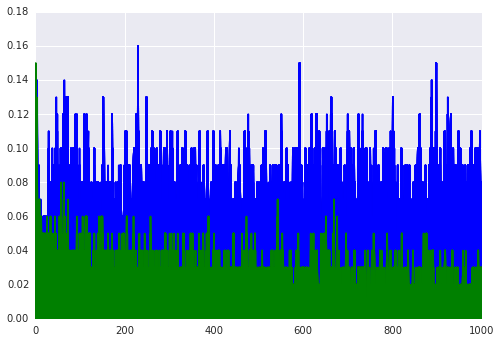

In [23]:
for run in ['a', 'b']:
    for chain in range(len(traces[run])):
        for dim in range(12):
            if run == 'a':
                plt.plot(range(1000), running_acceptance_rates_100window[run][chain][dim, :], 'b')
            elif run == 'b':
                plt.plot(range(1000), running_acceptance_rates_100window[run][chain][dim, :], 'g')

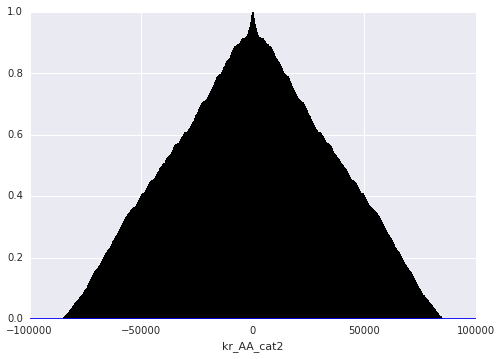

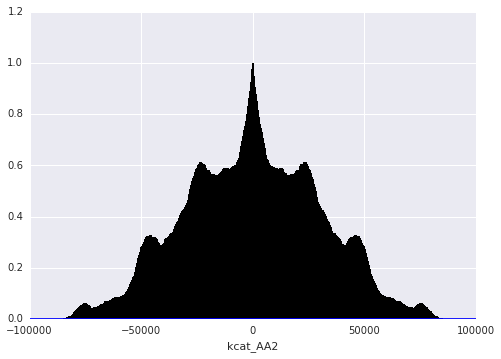

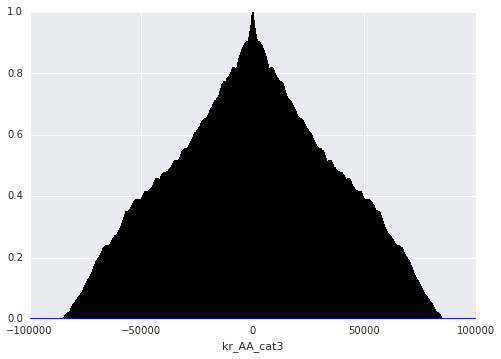

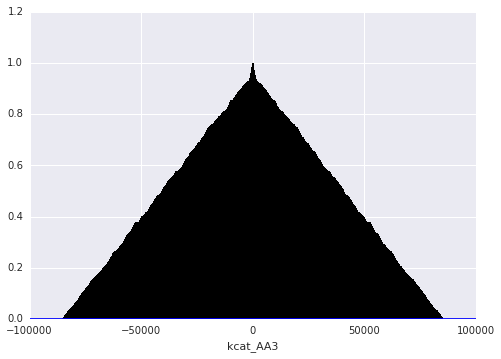

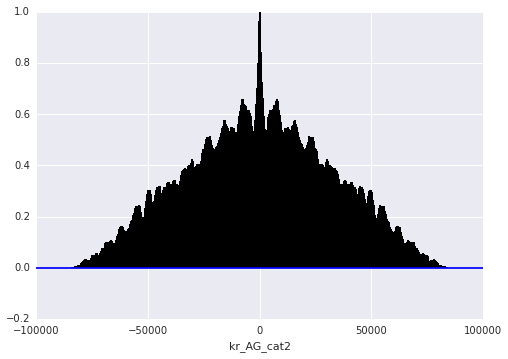

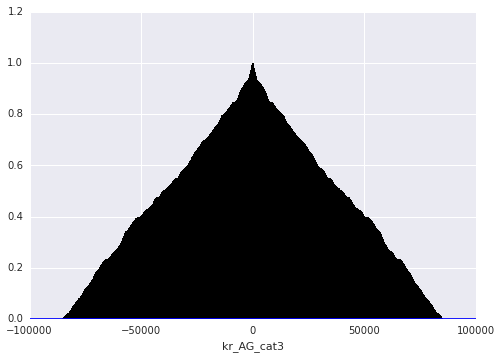

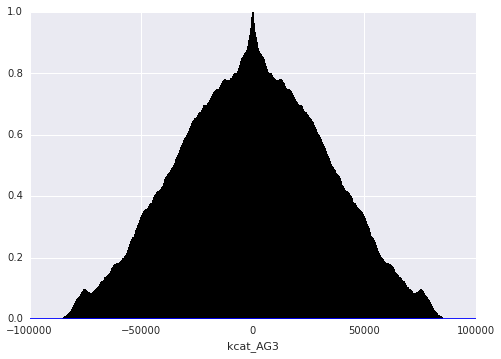

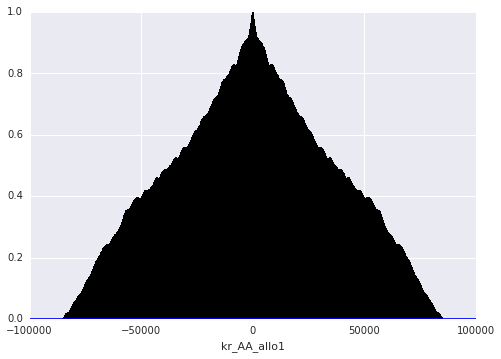

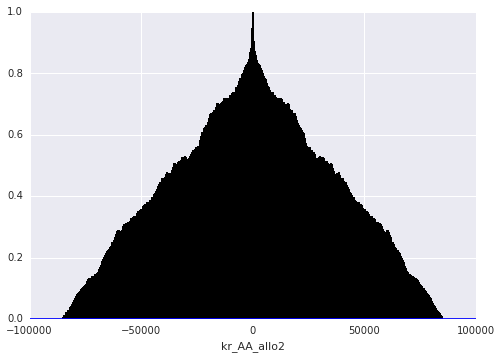

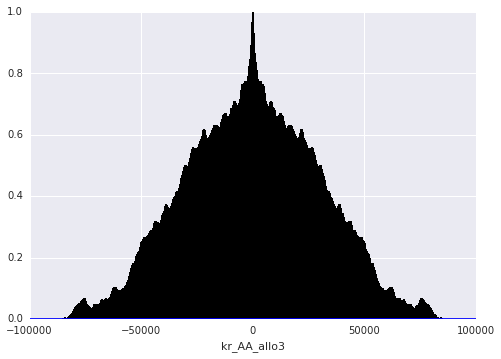

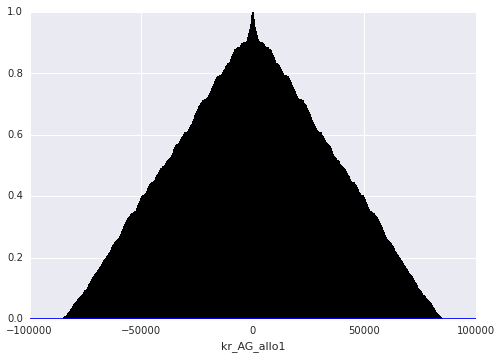

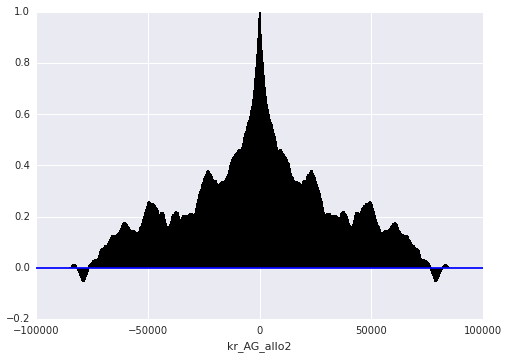

In [24]:
for dim, param_name in enumerate(sampled_param_names):
    fig = plt.figure()
    plt.acorr(traces['a'][0][15000:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [33]:
mcmc_samples = pd.DataFrame(trace_arr_a, columns=sampled_param_names)

In [34]:
mcmc_samples['logp'] = logp_arr_a[:,0]

In [35]:
mcmc_samples_subsampled = mcmc_samples.sample(frac=.10)

In [30]:
mcmc_samples_subsampled.to_csv('CORM_MCMC_samples_for_visualization.csv', index=False)

In [21]:
unique_samples = mcmc_samples.drop_duplicates()

In [22]:
unique_samples

kr_AA_cat2  kcat_AA2  kr_AA_cat3  kcat_AA3  kr_AG_cat2  kr_AG_cat3  \
0        -1.656638  0.420777   -2.069266  0.107489    0.248663   -2.885596   
3        -1.700117  0.420735   -2.087801  0.106316    0.201243   -2.896330   
5        -1.687701  0.415927   -2.108872  0.103234    0.230274   -2.898090   
15       -1.783227  0.422078   -2.159469  0.099800    0.113752   -2.933589   
19       -1.777824  0.422674   -2.155928  0.099546    0.123827   -2.936660   
24       -1.775401  0.429044   -2.139574  0.094125    0.131976   -2.937172   
25       -1.662592  0.389150   -2.122855  0.086899    0.294122   -2.838871   
26       -1.783429  0.332992   -2.078418  0.137275    0.189676   -2.854521   
28       -1.738105  0.328287   -2.033798  0.134855    0.232283   -2.805196   
34       -1.712403  0.334917   -2.017859  0.126778    0.263070   -2.802769   
41       -1.697785  0.335695   -2.020584  0.128431    0.274338   -2.807183   
42       -1.666273  0.312630   -2.012938  0.128802    0.338300   -2.759009   
43       -1.760743  0.318935   -2.053149  0.118901    0.218027   -2.770337   
52       -1.716278  0.308164   -2.043137  0.133759    0.270798   -2.828595   
54       -1.624536  0.295891   -2.101797  0.125010    0.349556   -2.800371   
56       -1.616960  0.320487   -2.091693  0.123829    0.336986   -2.821086   
58       -1.535455  0.312080   -2.037708  0.124809    0.427274   -2.768514   
72       -1.510960  0.305328   -2.039523  0.135604    0.459642   -2.805446   
76       -1.501285  0.290651   -2.033661  0.140846    0.482770   -2.790773   
78       -1.485447  0.281619   -2.053313  0.135414    0.507528   -2.759389   
79       -1.467047  0.277817   -2.026301  0.139244    0.518746   -2.737741   
82       -1.495489  0.289798   -1.994251  0.143547    0.475329   -2.715438   
92       -1.531120  0.291893   -2.004684  0.140495    0.439339   -2.734190   
96       -1.551440  0.298418   -2.074723  0.140725    0.407907   -2.809902   
101      -1.621325  0.281028   -2.042438  0.136004    0.357525   -2.734182   
107      -1.617849  0.284389   -2.037835  0.129957    0.358880   -2.751676   
110      -1.609334  0.286079   -2.030235  0.130633    0.359968   -2.753099   
111      -1.613448  0.279603   -2.067099  0.126413    0.371804   -2.755010   
114      -1.618553  0.285526   -2.059382  0.123990    0.359161   -2.783761   
121      -1.653454  0.303156   -2.071793  0.126001    0.307450   -2.814283   
...            ...       ...         ...       ...         ...         ...   
254717   -3.386504  0.049946   -1.455498  0.163441   -1.115532   -1.766796   
254726   -3.452866  0.024501   -1.423309  0.162543   -1.156340   -1.685509   
254735   -3.441068  0.007342   -1.493646  0.161748   -1.125371   -1.755098   
254740   -3.266277  0.062882   -1.757517  0.148442   -0.997675   -2.051568   
254761   -3.294483  0.067649   -1.750363  0.150652   -1.028582   -2.055304   
254762   -3.347708  0.078917   -1.758111  0.159844   -1.093990   -2.116994   
254764   -3.423795  0.032043   -1.689673  0.158636   -1.113501   -2.008717   
254767   -3.506697  0.051261   -1.836153  0.151665   -1.212643   -2.141355   
254776   -3.798102  0.048714   -2.073901  0.153123   -1.509965   -2.353108   
254788   -3.645965  0.022813   -2.012783  0.157107   -1.341523   -2.265789   
254789   -3.732966  0.045845   -2.110795  0.149735   -1.441976   -2.380581   
254792   -3.810489  0.048188   -2.044163  0.148310   -1.511535   -2.314523   
254796   -3.822938  0.033462   -2.015604  0.152334   -1.509694   -2.266325   
254800   -3.731528  0.011024   -2.165843  0.165298   -1.393580   -2.389174   
254806   -3.782806  0.000318   -2.326195  0.160098   -1.432732   -2.525044   
254815   -3.738997 -0.004528   -2.340257  0.157544   -1.382185   -2.535464   
254819   -3.772918  0.010221   -2.184963  0.153282   -1.433749   -2.399061   
254822   -3.690990  0.034070   -2.221160  0.152386   -1.378019   -2.464517   
254832   -3.737121  0.031493   -2.184732  0.155213   -1.425475   -2.423647   
254858   -3.724896  0.036459  

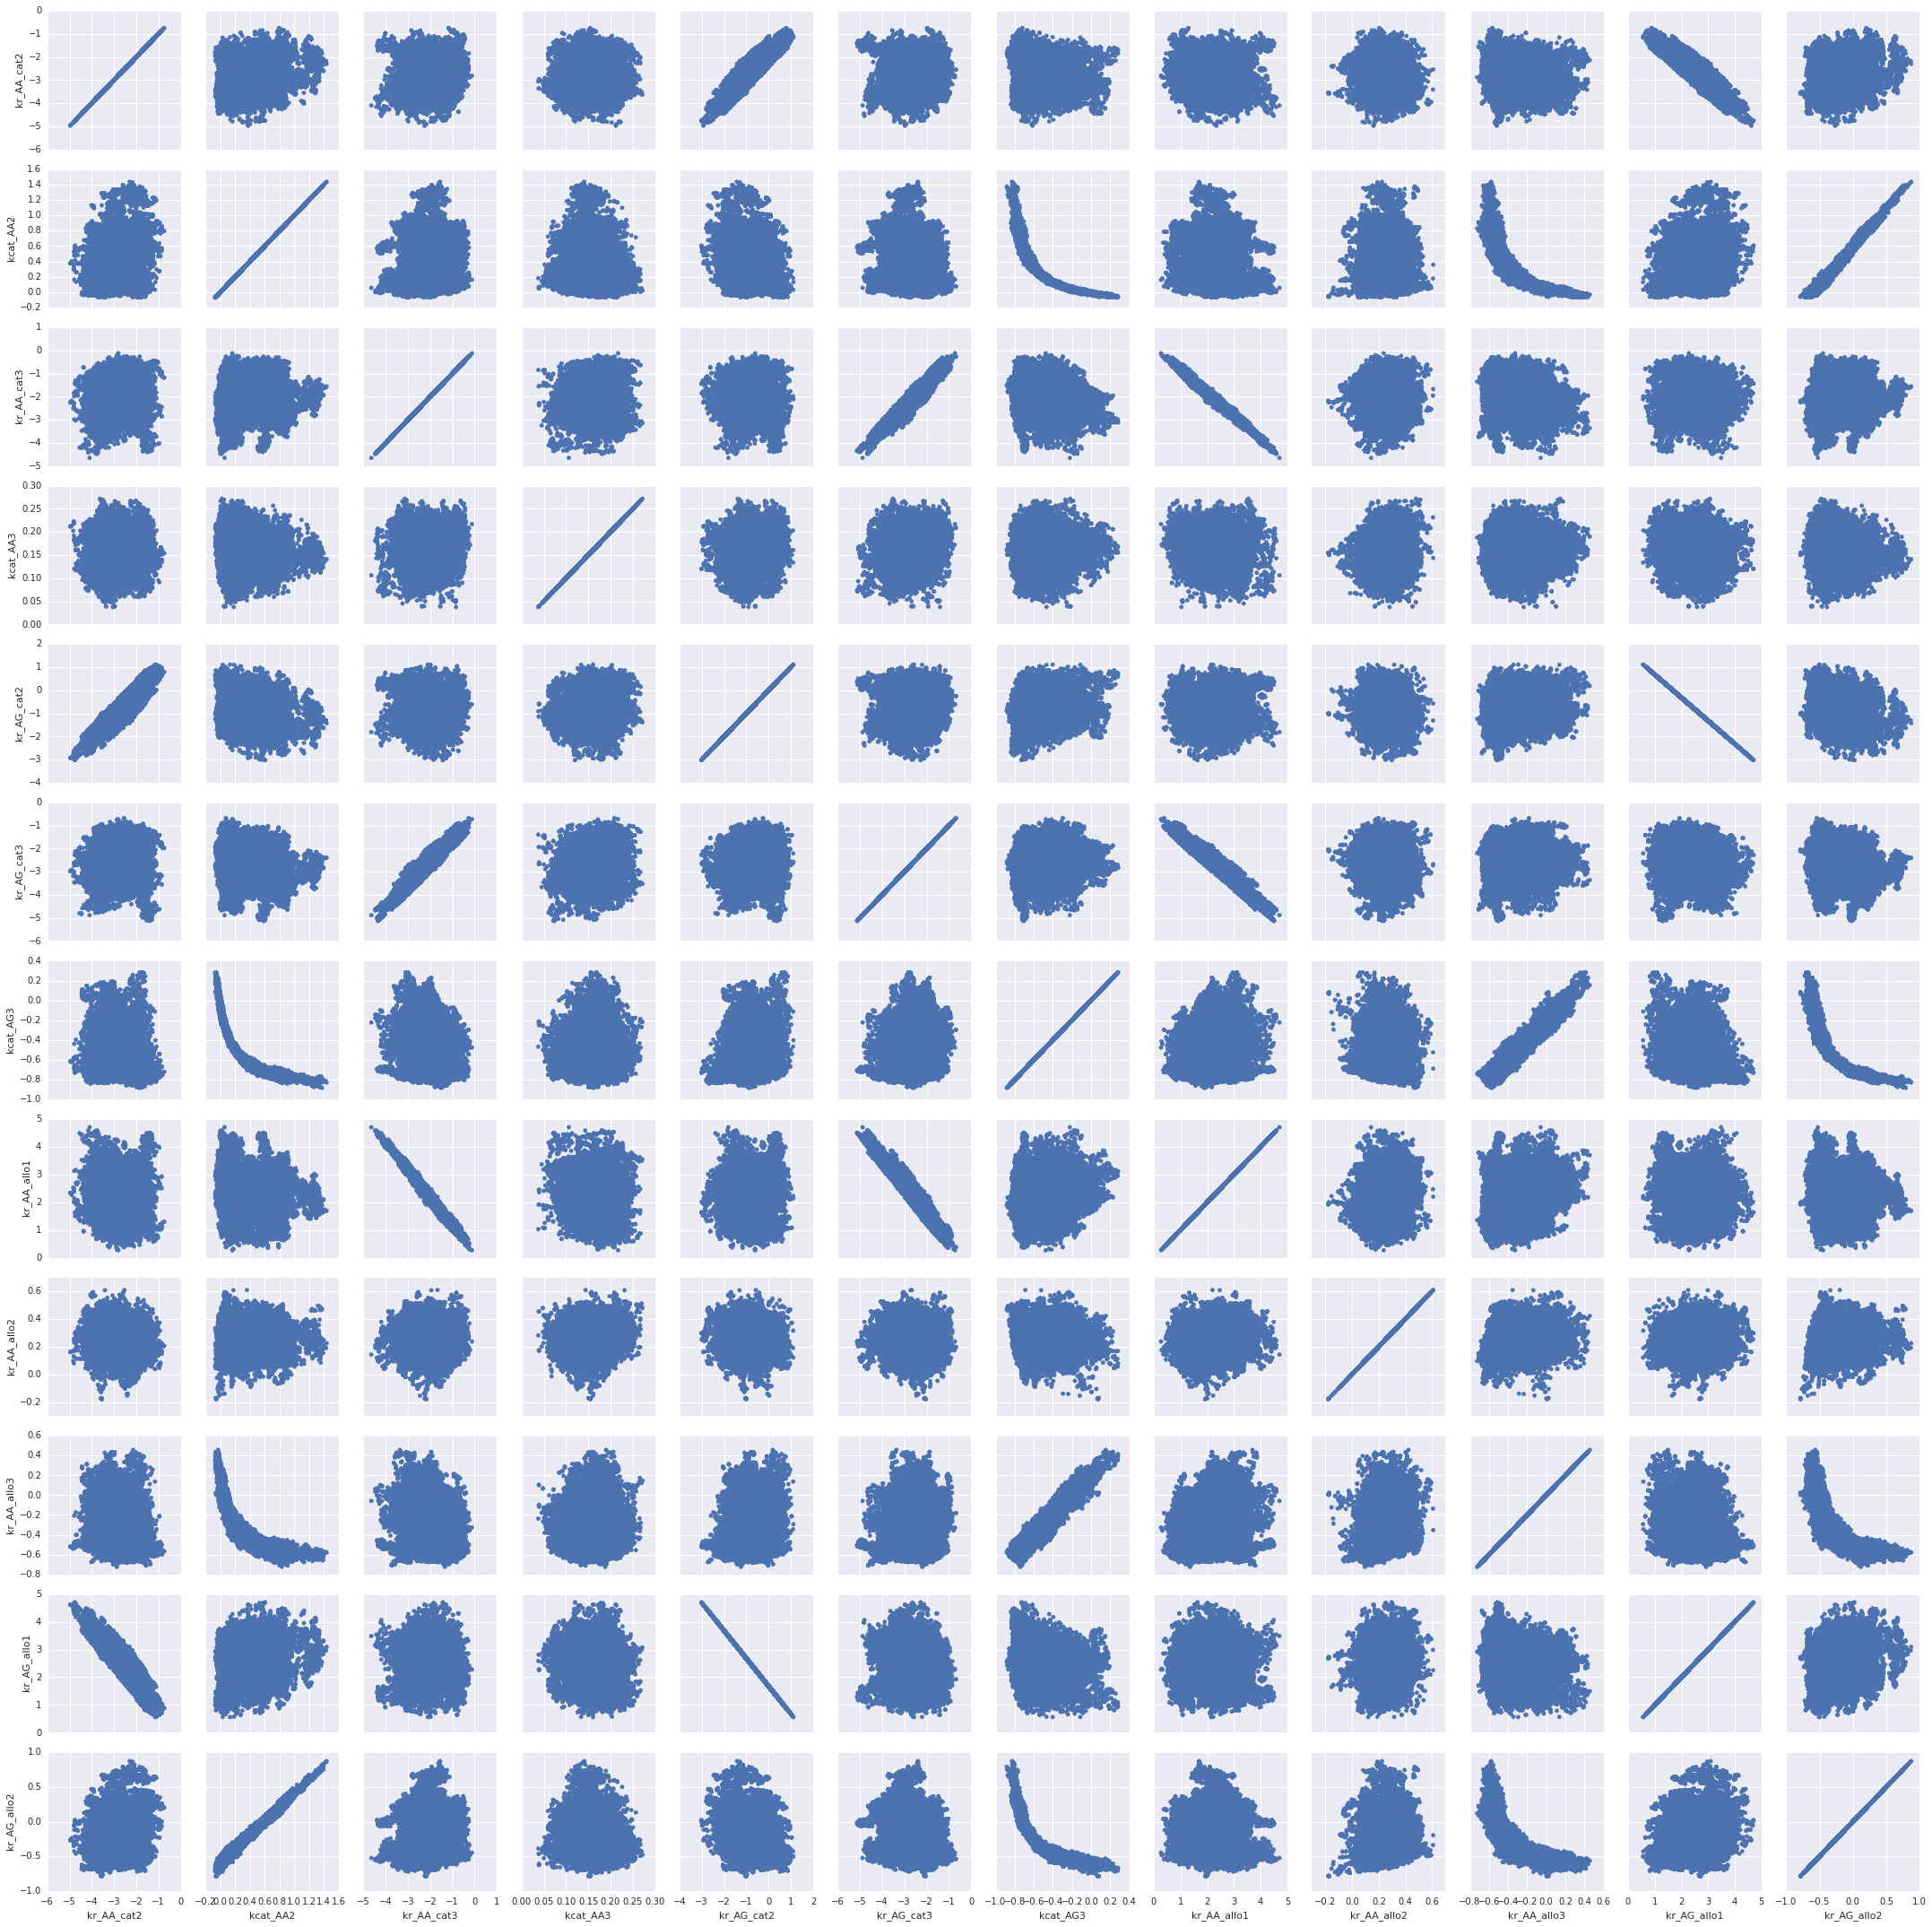

In [25]:
g = sns.PairGrid(mcmc_samples.sample(frac=.10))
g.map(plt.scatter)

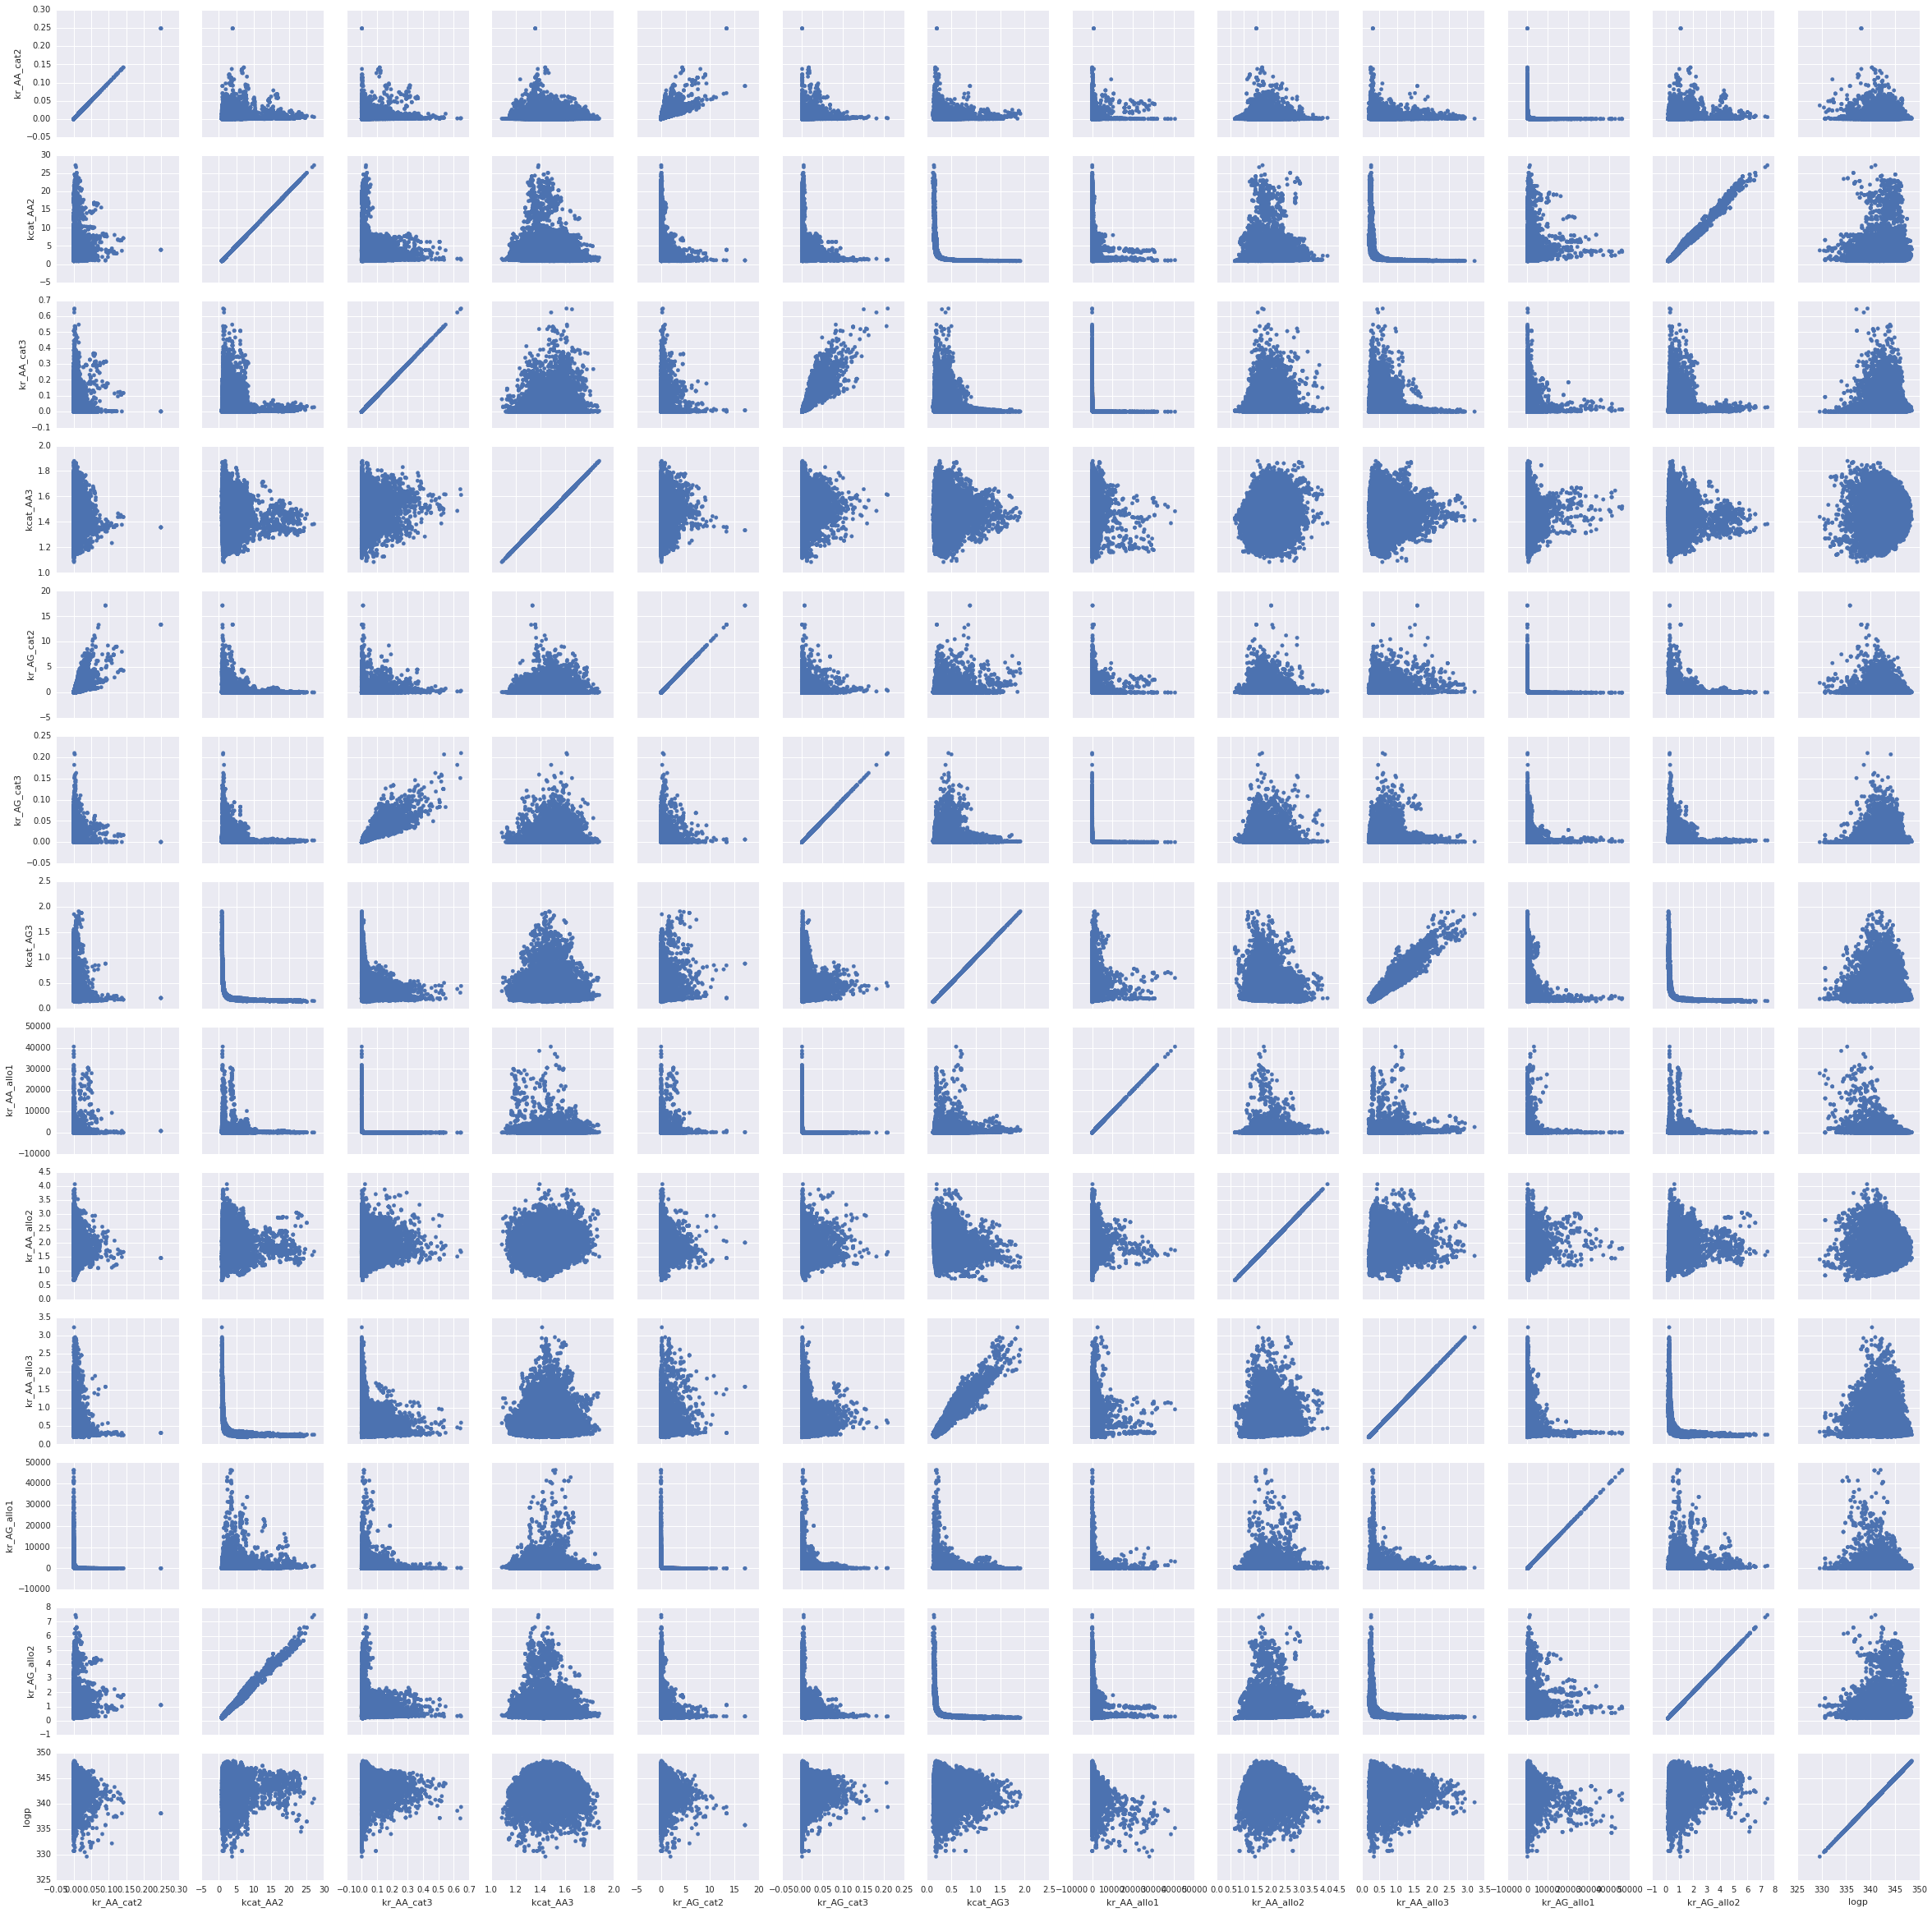

In [31]:
g = sns.PairGrid(mcmc_samples.sample(frac=.10))
g.map(plt.scatter)

In [30]:
float(38644.0/255000)*100

15.154509803921567

In [33]:
float(36666.0/350000)*100

10.476

In [85]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata

250151 255000


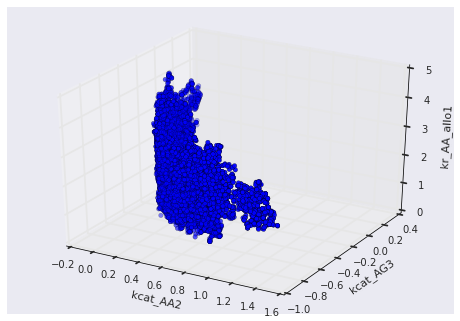

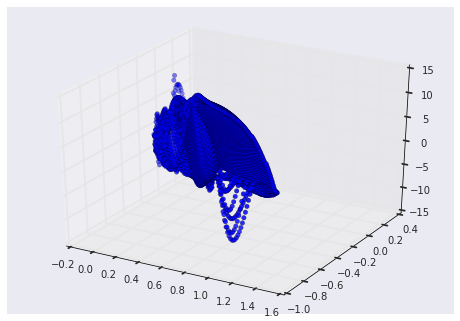

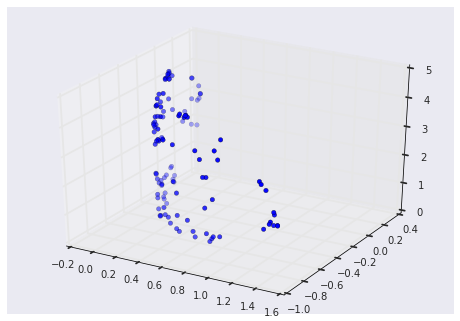

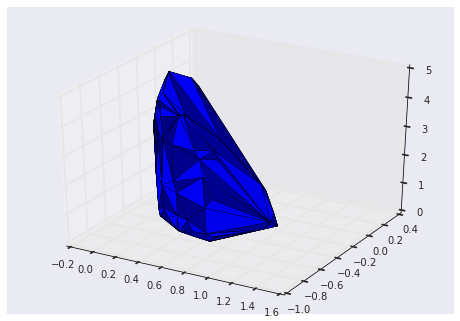

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mcmc_samples_subsampled['kcat_AA2'], mcmc_samples_subsampled['kcat_AG3'], mcmc_samples_subsampled['kr_AA_allo1'])
ax.set_xlabel('kcat_AA2')
ax.set_ylabel('kcat_AG3')
ax.set_zlabel('kr_AA_allo1')
hull_points = test_points[hull.vertices]
x1 = np.linspace(hull_points[:,0].min(), hull_points[:,0].max(), len(hull_points))
y1 = np.linspace(hull_points[:,1].min(), hull_points[:,1].max(), len(hull_points))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((hull_points[:,0], hull_points[:,1]), hull_points[:,2], (x2, y2), method='cubic')
#ax.plot_surface(x2, y2, z2)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x2, y2, z2)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(hull_points[:,0], hull_points[:,1], hull_points[:,2])
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
print hull.simplices.max(), len(test_points[:,0])
ax4.plot_trisurf(test_points[:,0], test_points[:,1], test_points[:,2], triangles=hull.simplices)

In [90]:
test_points = np.squeeze(np.dstack((mcmc_samples['kcat_AA2'].values, mcmc_samples['kcat_AG3'].values, mcmc_samples['kr_AA_allo1'])))

In [53]:
from scipy.spatial import ConvexHull

In [98]:
hull = ConvexHull(test_points)

In [104]:
hull.simplices

array([[114397, 230878,  27213],
       [ 10038, 230878,  27213],
       [161893, 134841, 161569],
       [161893, 134841,  20306],
       [221560, 134841, 221571],
       [221560, 134841,  20306],
       [ 20382, 117622, 194629],
       [ 20382, 161893,  20306],
       [ 20382, 161893, 117622],
       [ 20382, 221560,  20306],
       [105336,  13937, 100092],
       [114133, 114397, 114122],
       [114407, 114397, 230878],
       [161841, 162645,   9833],
       [162323, 161517, 161569],
       [162323, 161841, 161569],
       [162323, 161841, 162645],
       [236391,  10038, 230878],
       [236391, 162645,   9833],
       [ 10344,  27398,   9833],
       [ 10344,  10401,   9833],
       [ 10344,  10401, 194629],
       [ 10427,  10401,   9833],
       [ 10427,  10467, 117622],
       [ 10427, 117622, 194629],
       [ 10427,  10401, 194629],
       [161554, 161893, 161569],
       [161554, 161893, 117622],
       [161554, 161841, 161569],
       [161554,  10467, 117622],
       [16

In [105]:
def tri_edge_length(v1, v2, v3):
    l13 = np.sqrt((v2-v1)**2 + (v3-v2)**2)
    ll2 = np.sqrt((v3-v2)**2 + (v3-v1)**2)
    l23 = np.sqrt((v3-v1)**2 + (v2-v1)**2)
    
    return l13, l12, l23